# Loading Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from numpy.random import RandomState
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV 
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("databases/trainReduzido.csv")
df = df.drop(['Unnamed: 0'], axis='columns')
df = df.to_numpy()

In [3]:
y_all = df[:,0]
x_all = df[:,1:]
N_labels = len(set(y_all))

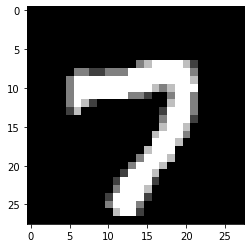

In [4]:
first_image = x_all[-1,:]
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# Applying PCA

In [5]:
num_components = 784
pca = PCA(n_components=num_components)
pca.fit(x_all)
x_all_transformed = pca.transform(x_all)
print(x_all_transformed.shape)
explained_variance = pca.explained_variance_

(13017, 784)


Text(0.5, 1.0, 'Explained Variance vs PC')

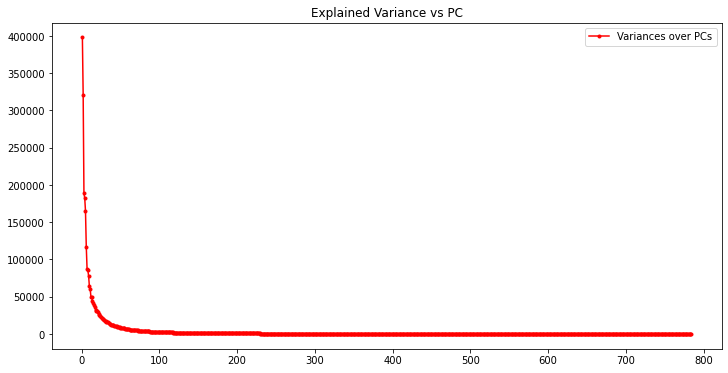

In [6]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.linspace(1,num_components,num_components), explained_variance,'r', marker='.', label="Variances over PCs")
ax.legend()
ax.set_title('Explained Variance vs PC')

In [7]:
num_components = 60
pca = PCA(n_components=num_components)
pca.fit(x_all)
x_all_pca = pca.transform(x_all)
print(x_all_pca.shape)
explained_variance = pca.explained_variance_

(13017, 60)


Text(0.5, 1.0, 'Explained Variance vs PC')

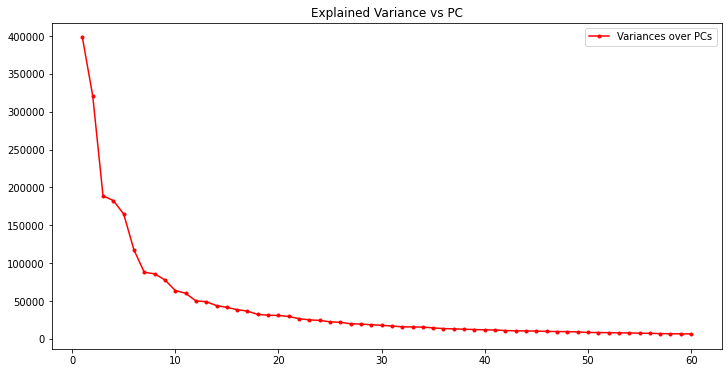

In [8]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.linspace(1,num_components,num_components), explained_variance,'r', marker='.', label="Variances over PCs")
ax.legend()
ax.set_title('Explained Variance vs PC')

# SVM Classifier

In [10]:
# SVM application
parameters = {'C': np.logspace(-3, 2, 30)}
y = y_all
svc = svm.SVC(kernel="rbf", gamma='scale')
clf = GridSearchCV(svc, parameters, scoring='accuracy', refit=True, cv=10, verbose=1)  #To see results for each C just add: verbose=3
# Run fit with all sets of parameters.
clf.fit(x_all_pca, y)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 1.48735211e-03, 2.21221629e-03, 3.29034456e-03,
       4.89390092e-03, 7.27895384e-03, 1.08263673e-02, 1.61026203e-02,
       2.39502662e-02, 3.56224789e-02, 5.29831691e-02, 7.88046282e-02,
       1.17210230e-01, 1.74332882e-01, 2.59294380e-01, 3.85662042e-01,
       5.73615251e-01, 8.53167852e-01, 1.26896100e+00, 1.88739182e+00,
       2.80721620e+00, 4.17531894e+00, 6.21016942e+00, 9.23670857e+00,
       1.37382380e+01, 2.04335972e+01, 3.03919538e+01, 4.52035366e+01,
       6.72335754e+01, 1.00000000e+02])},
             scoring='accuracy', verbose=1)

In [11]:
C = clf.best_params_
score = clf.best_score_
print("The best accuracy average was " + str(score) + " and was achieved for " + str(C) )

The best accuracy average was 0.9944691605535623 and was achieved for {'C': 2.8072162039411785}


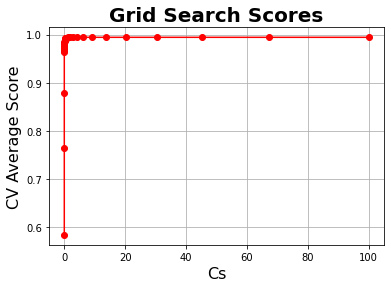

In [13]:
def plot_grid_search(cv_results, grid_param_1, name_param_1):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean)

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd)

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    ax.plot(grid_param_1, scores_mean[:], '-o', color="red")

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.grid('on')

# Calling Method 
Cs = np.logspace(-3, 2, 30)
plot_grid_search(clf.cv_results_, Cs, 'Cs')

In [17]:
acc = np.zeros(10)  
for i in range(10):
    # Separate data between training and test:
    X_train, X_test, y_train, y_test = train_test_split(x_all_pca, y_all, test_size=0.3)
    clf = svm.SVC(kernel="rbf", gamma='scale', C=C['C'])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc[i] = accuracy_score(y_test, y_pred)

print("\nAcurácia média para modelo considerando " + str(num_components) + " features: " + '{:.3f}'.format(acc.mean()) + " +/- " + '{:.3f}'.format(acc.std()))


Acurácia média para modelo considerando 60 features: 0.994 +/- 0.001



Acc: 0.9948796722990272


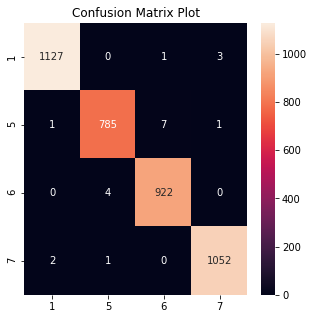

In [18]:
df_confusion = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches
sns.heatmap(df_confusion, annot=True, ax=ax, fmt='g')
plt.title('Confusion Matrix Plot')
ax.xaxis.set_ticklabels([1,5,6,7]); ax.yaxis.set_ticklabels([1,5,6,7]);
    
#plot_confusion_matrix(df_confusion)
print("\nAcc: " + str(accuracy_score(y_test,y_pred)))

# Final Submission

In [19]:
df_test = pd.read_csv("databases/validacao.csv")
#df_trab = df_trab.to_numpy()
df_test.head(5)

,Unnamed: 0,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
indexes = df_test['Unnamed: 0']
df = df_test.drop(['Unnamed: 0'], axis='columns')
x_all_test = df.to_numpy()

(4000, 60)


Text(0.5, 1.0, 'Explained Variance vs PC')

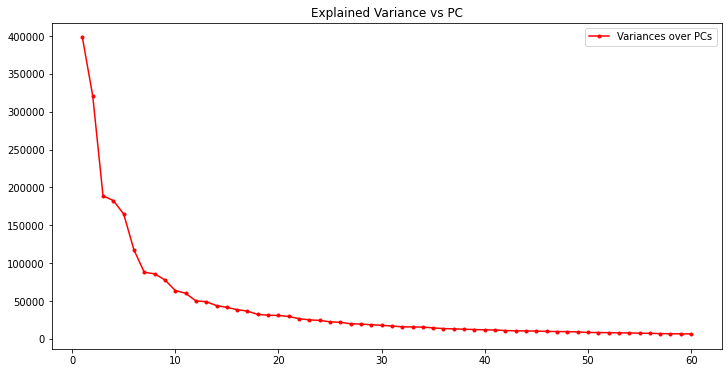

In [21]:
x_test_pca = pca.transform(x_all_test)
print(x_test_pca.shape)
explained_variance = pca.explained_variance_
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.linspace(1,num_components,num_components), explained_variance,'r', marker='.', label="Variances over PCs")
ax.legend()
ax.set_title('Explained Variance vs PC')

In [22]:
clf = svm.SVC(kernel="rbf", gamma='scale', C=C['C'])
clf.fit(x_all_pca, y_all)
y_pred_test = clf.predict(x_test_pca)

In [23]:
y_pred_test = pd.DataFrame(y_pred_test)
final_df = pd.concat([indexes, y_pred_test], axis=1)
final_df = final_df.rename(columns={"Unnamed: 0" : 'ImageId', 0: 'Label'})
final_df.to_csv("result.csv", sep=',', index=False) # Arquive to send in kaggle compettition
final_df.sample(10)  

,ImageId,Label
1746,8260,6
3103,973,7
2162,1578,6
1989,10754,5
292,2592,1
1169,1822,5
3599,5847,7
1783,8669,5
2153,1513,6
3598,5845,7
